Text(0,0.5,'loss')

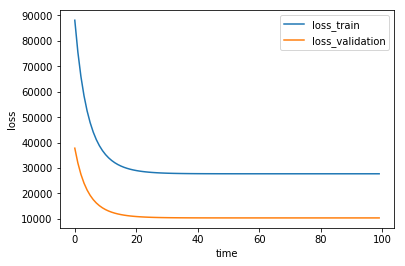

In [1]:
%matplotlib inline
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#获取数据集
def get_data():
    data = load_svmlight_file("H:\datasets\housing_scale.txt")
    return data[0], data[1]

#数据集预处理
X, y = get_data()
X = X.toarray()
row = X.shape[0]
A = np.ones([row,])
X = np.c_[X,A]
#切割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_test_split(y, shuffle=False)
#初始化
R =X_train.shape[0]
namda = 0
M = np.zeros(14,)
learning_rate = 0.02
G = 0
S = 100
L_train = np.zeros([S])
L_validation = np.zeros([S])

#训练模型
for a in range(S):
    for i in range(row):
        G = G + namda*M + (np.dot(X[i].T,X[i])*M-np.dot(X[i].T,y[i]))
    G = G/row
    M = M - learning_rate*G
    L_train[a] = 0.5*np.dot(M.T,M)+0.5*np.dot((y_train-np.dot(X_train,M)).T,y_train-np.dot(X_train,M))
    L_validation[a] = 0.5*np.dot(M.T,M)+0.5*np.dot((y_test-np.dot(X_test,M)).T,y_test-np.dot(X_test,M))
n = np.arange(S)

#制图
plt.plot(n,L_train[n],label='loss_train')
plt.plot(n,L_validation[n],label='loss_validation')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')